# Lista 8 de exercícios - Visualização de dados

Chegamos à ultima lista de exercícios do nosso curso, do tema "Visualização de dados". Aqui, usaremos um *dataset* de dados de uma certa clínica médica, em que cada observação corresponde a um paciente. Importemos os dados:

In [1]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Baixando os dados
data = pd.read_csv("insurance.csv")

Breve descrição das colunas:


**age**: idade do beneficiário primário

**sex**: gênero do contratante 

**bmi**: índice de massa corporal (IMC)

**children**: número de crianças cobertas pelo plano / número de dependentes

**smoker**: fumante ("yes", se fumante; "no", se não fumante)

**region**: área residencial do paciente nos EUA: Nordeste (northeast), Sudeste (southeast), Sudoeste (southwest), Noroeste (northwest).

**charges**: custos médicos individuais cobrados pelo plano de saúde

Explorando os dados:

In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Exercícios:

### 1) Faça um gráfico para analisar a associação entre idade e cobrança do plano.

Text(0.5, 1.0, 'Associacao entre idade e cobranca do plano')

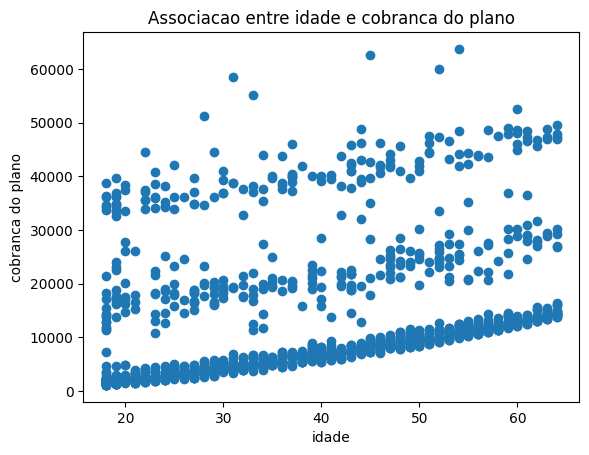

In [10]:
### SEU CÓDIGO COMEÇA AQUI ###
idade_plano=plt.scatter(data['age'],data['charges'])
plt.xlabel('idade')
plt.ylabel('cobranca do plano')
plt.title('Associacao entre idade e cobranca do plano')

### 2) 

#### a) Faça um gráfico para analisar a quantidade de fumantes e não-fumantes na amostra

Text(0.5, 1.0, 'Analise sobre quantidade fumantes e nao fumantes')

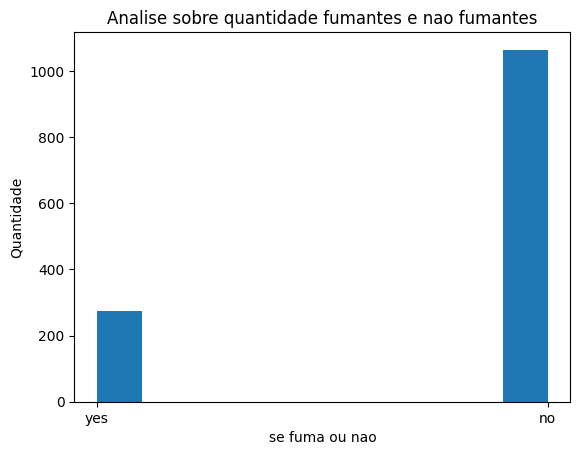

In [28]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data["smoker"])
plt.xlabel('se fuma ou nao')
plt.ylabel('Quantidade')
plt.title('Analise sobre quantidade fumantes e nao fumantes')

#### b) Agora, faça um gráfico para analisar a quantidade de homens e mulheres na amostra

Text(0.5, 1.0, 'Analise sobre quantidade de homens e mulheres')

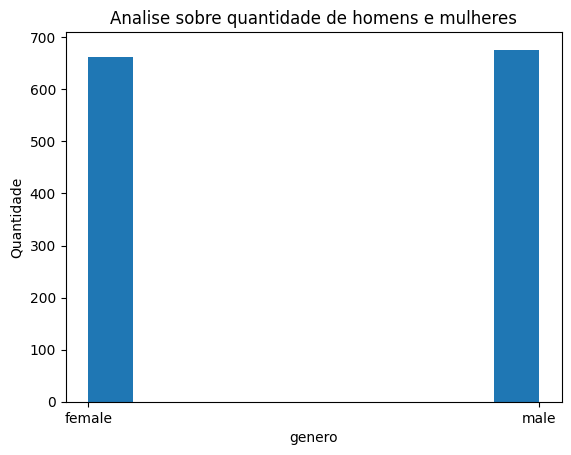

In [29]:
### SEU CÓDIGO COMEÇA AQUI ###
plt.hist(data["sex"])
plt.xlabel('genero')
plt.ylabel('Quantidade')
plt.title('Analise sobre quantidade de homens e mulheres')

#### c) Por fim, faça um gráfico para analisar a quantidade de indivíduos de cada sexo em cada categoria de "smoker" (fumante)
dica: dê uma olhada na função ```.countplot()``` do *Seaborn*

Text(0.5, 1.0, 'quanitdade de individuos de cada sexo em cateogria dos fumantes')

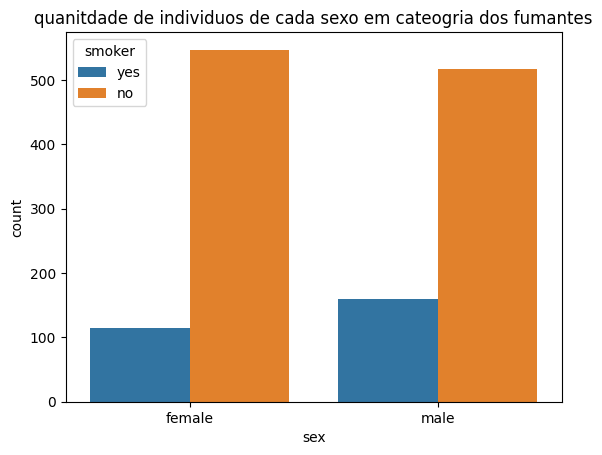

In [117]:
### SEU CÓDIGO COMEÇA AQUI ###
sns.countplot(x=data['sex'], hue=data['smoker'])
plt.title('quanitdade de individuos de cada sexo em cateogria dos fumantes')

### 3) Faça um gráfico que nos permita analisar a distribuição da cobrança do plano de saúde para cada região dos EUA

<Axes: xlabel='region', ylabel='charges'>

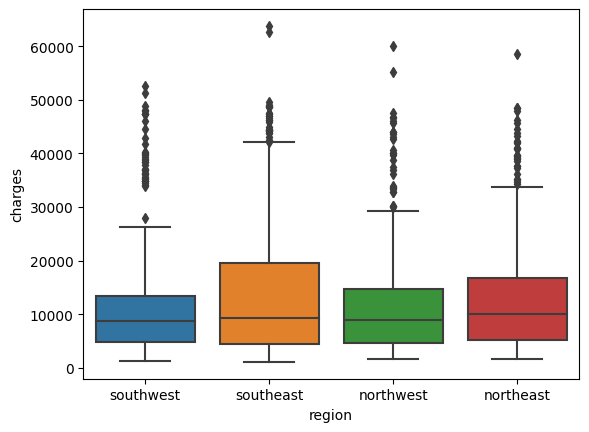

In [118]:
### SEU CÓDIGO COMEÇA AQUI ###
sns.boxplot(x='region', y='charges', data=data)


### 4) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

#### a) Faça um gráfico que nos permita ver a evolução da proporção de fumantes para cada idade na amostra

<Axes: xlabel='age'>

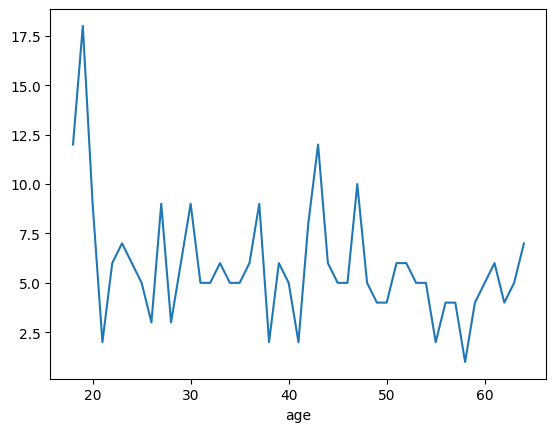

In [114]:
### SEU CÓDIGO COMEÇA AQUI ###
#extraindo apenas os dados da categoria "fumante"
smoker=data[data['smoker']=='yes']
contagem1 = smoker['age'].value_counts()
contagem1 = contagem.sort_index()
contagem1.plot(kind='line')

#### b) Faça um gráfico que nos permita ver a evolução do IMC médio para cada idade na amostra

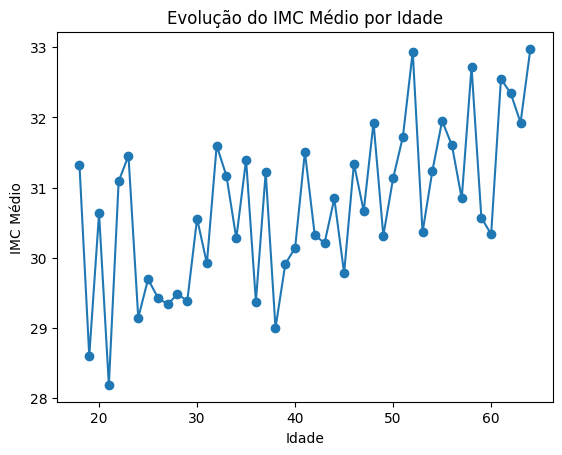

In [74]:
### SEU CÓDIGO COMEÇA AQUI ###
# Calcular a média do IMC para cada idade
media_imc = data.groupby('age')['bmi'].mean().reset_index()

# Plotar o gráfico de linha
plt.plot(media_imc['age'], media_imc['bmi'], marker='o')
plt.xlabel('Idade')
plt.ylabel('IMC Médio')
plt.title('Evolução do IMC Médio por Idade')
plt.show()

#### c) Faça um gráfico que nos permita analisar a evolução do número médio de crianças no plano para cada idade na amostra

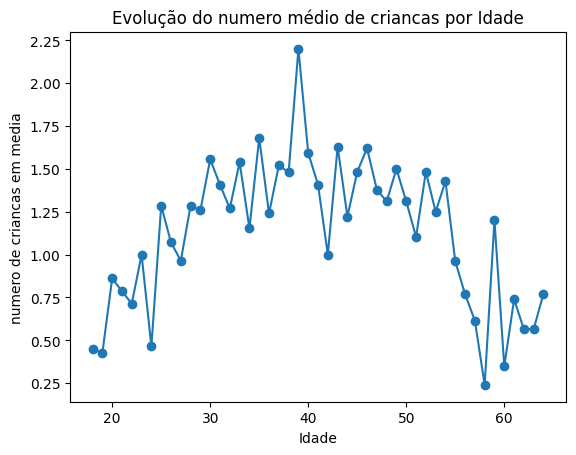

In [75]:
### SEU CÓDIGO COMEÇA AQUI ###
# Calcular a numero medio de criancas para cada idade
idade = data.groupby('age')['children'].mean().reset_index()

# Plotar o gráfico de linha
plt.plot(idade['age'], idade['children'], marker='o')
plt.xlabel('Idade')
plt.ylabel('numero de criancas em media')
plt.title('Evolução do numero médio de criancas por Idade')
plt.show()

### 5) Faça um gráfico que nos permita analisar a correlação entre todas as colunas ao mesmo tempo (para incluir "sex" e "smoker" na análise, crie variáveis binárias para cada uma das colunas)
dica: crie um novo dataframe com as duas colunas citadas com variáveis binárias

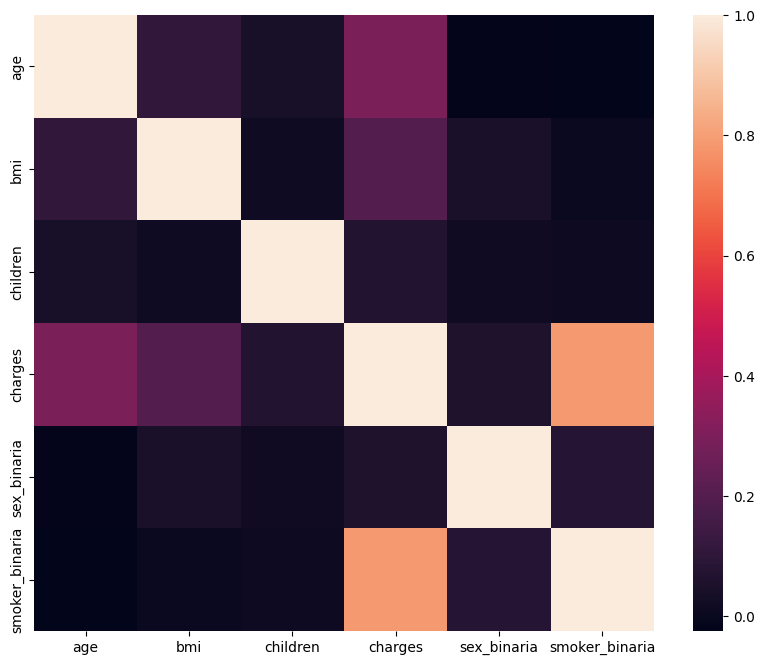

In [109]:
### SEU CÓDIGO COMEÇA AQUI ###

data = pd.read_csv("insurance.csv")
#Criar uma coluna "sex_binaria", sendo a mulher = 0 e o homem =1
data['sex_binaria']=data['sex'].map({'female':0, 'male':1})

#criar uma coluna "smoker_binaria", sendo fumante=1 e nao fumante=0

data['smoker_binaria']=data['smoker'].map({'yes':1, 'no':0})

#Criar um DataFrame "data2"
data2 = data.drop(['sex'], axis = 1, inplace=True)
data2 = data.drop(['smoker'], axis = 1, inplace=True)

#Tirar a coluna sobre regioes , pois nao pode calcular correlacoes sobre variaveis qualitativas
data2 = data.drop(['region'], axis=1)
data2.head()

correlacoes = data2.corr()

#Usar mapa de calor para descobrir correlacoes entre variaveis
plt.figure(figsize = (10,8))
sns.heatmap(correlacoes)
plt.show()

### 6) Faça um gráfico interativo e dinâmico da distribuição de cobrança para fumantes e não-fumantes 
dica: o nome da função na biblioteca é ```.box()```

In [7]:
### SEU CÓDIGO COMEÇA AQUI ###
#pip install nbformat
import nbformat 
px.box(data_frame=data, x="charges", y="smoker", points='all')
